Copyright **`(c)`** 2023 Giovanni Squillero `<giovanni.squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free for personal or classroom use; see [`LICENSE.md`](https://github.com/squillero/computational-intelligence/blob/master/LICENSE.md) for details.  

# LAB9

Write a local-search algorithm (eg. an EA) able to solve the *Problem* instances 1, 2, 5, and 10 on a 1000-loci genomes, using a minimum number of fitness calls. That's all.

### Deadlines:

* Submission: Sunday, December 3 ([CET](https://www.timeanddate.com/time/zones/cet))
* Reviews: Sunday, December 10 ([CET](https://www.timeanddate.com/time/zones/cet))

Notes:

* Reviews will be assigned  on Monday, December 4
* You need to commit in order to be selected as a reviewer (ie. better to commit an empty work than not to commit)

In [1]:
from random import choices, choice, randint, random
import lab9_lib
import numpy as np
from matplotlib import pyplot as plt

In [2]:
fitness = lab9_lib.make_problem(10)
for n in range(10):
    ind = choices([0, 1], k=50)
    print(f"{''.join(str(g) for g in ind)}: {fitness(ind):.2%}")

print(fitness.calls)

11101000001000101101000110100111001101011000010110: 15.34%
00100100011101100110011000000110111101100001001110: 23.56%
00110111100110011001011100000110000000000000001110: 11.56%
11001101001100011011110010000011101101000010111111: 31.36%
10110001010010011001011100011110010101101101110010: 7.33%
00110111111010000100100010100001100010010110001000: 15.56%
00000111010100111000010001111100011111110101111111: 19.11%
00010101100101111011010101100111001111011011100011: 23.33%
01010110111110101101111011000000010001011110010110: 7.33%
01110010111011011110111001100010001101010000011100: 15.33%
10


### Definition of the functions that will allow the exploration of new genomes to find the best path

In [3]:
def parent_selection(population):
    """ This function is selecting two random individuals from the population and return the best one."""
    ind1 = choice(population)
    ind2 = choice(population)
    
    if fitness(ind1) > fitness(ind2):
        return ind1
    else:    
        return ind2

In [4]:
def xover(ind1, ind2):
    """ This function is performing crossover between two individuals."""
    gen_length = min(len(ind1), len(ind2))    
    g = randint(0, gen_length - 1)
    if randint(0, 1) == 0:
        return  ind1[:g] + ind2[g:]
    else:  
        return ind2[:g] + ind1[g:]
         

In [5]:
def double_xover(ind1, ind2):
    """ This function is performing two-point crossover on two individuals."""
    gen_length = min(len(ind1), len(ind2))
    g1 = randint(0, gen_length - 1)
    g2 = randint(g1, gen_length - 1)

    if randint(0, 1) == 0:
        return  ind1[:g1] + ind2[g1:g2] + ind1[g2:]
    else:   
        return  ind2[:g1] + ind1[g1:g2] + ind2[g2:]

In [6]:
def mutation(ind):
    """ This function is selecting one random gene and return a mutation of it."""
    gen_length = len(ind)
    new_ind = ind.copy()
    g = randint(0, gen_length-1)
    new_ind[g] = 1 - new_ind[g]
    return new_ind

In [7]:
def swap(ind):
    """ This function is selecting two random genes and return a swap of them."""
    gen_length = len(ind)
    new_ind = ind.copy()
    g1, g2 = tuple(choices(range(0, gen_length), k=2))
    new_ind[g1] = ind[g2]
    new_ind[g2] = ind[g1]
    return new_ind

In [8]:
def reversion(ind):
    """ This function is selecting two random genes and return a reversion of the genome between them."""
    gen_length = len(ind)
    new_ind = ind.copy()
    pos1 = randint(0, gen_length - 2)
    pos2 = randint(pos1, gen_length - 1)
    new_ind[pos1:pos2] = list(reversed(ind[pos1:pos2]))
    return new_ind

### Definition of the parameters


In [20]:
LEN_GEN = 50
POP_SIZE = 100
MAX_GENERATIONS = 1000
MUTATION_RATE = 0.15
SWAP_RATE = 0.15
REVERSION_RATE = 0.15
DOUBLE_CROSSOVER_RATE = 0.15
PROBLEM_SIZE = [1, 2, 3, 4, 5]
DESCENDANTS_SIZE = 30
NUM_GENERATIONS = 1000

I have tried various combinaisons of these parameters and those shown seems to be the best ones.

### Definition of the function of evolution

In [14]:
def evolution(population,early_stop = 10):
    stop = 0
    best_fit = float("-inf")
    list_fit = []

    for generation in range(NUM_GENERATIONS):
        descendants = []

        for _ in range(DESCENDANTS_SIZE):
            p1 = parent_selection(population)
            if random() < MUTATION_RATE:
                p1 = mutation(p1)
            elif random() < SWAP_RATE:
                p1 = swap(p1)
            elif random() < REVERSION_RATE:
                p1 = reversion(p1)
            else :
                p1 = p1

                
            p2 = parent_selection(population)
            if random() < DOUBLE_CROSSOVER_RATE:
                d = double_xover(p1, p2)
            else:
                d = xover(p1, p2)
            
            descendants.append(d)


        new_population = population + descendants

        new_population.sort(key=lambda i: fitness(i), reverse=True)
        population = new_population[:POP_SIZE]

        best_indiv = population[0]

        if fitness(best_indiv) > best_fit:
            best_fit = fitness(best_indiv)
            stop = 0
            
        else:
            stop += 1

        list_fit.append(best_fit)

        if best_fit == 1:
            print(f"Best individual: {best_indiv}")
            print(f"Best fitness: {fitness(best_indiv):.2%}")
            print(f"Converged at generation {generation}")
            break   
        if stop >= early_stop:
            print(f"Converged at generation {generation}")
            print(f"Best individual: {best_indiv}")
            print(f"Best fitness: {fitness(best_indiv):.2%}")
            break
        if generation == NUM_GENERATIONS - 1:
            print(f"Best individual: {best_indiv}")
            print(f"Best fitness: {fitness(best_indiv):.2%}")
            print(f"Converged at generation {generation}")

    plt.plot(range(0, generation + 1), list_fit)
    plt.xlabel("Generations")
    plt.ylabel("Best fitness")
    plt.title("Evolution of the best fitness over generations")
    plt.show()



### Resolution

In [11]:
population = []
for n in range(POP_SIZE):
    ind = choices([0, 1], k=LEN_GEN)
    population.append(ind)
    print(f"{''.join(str(g) for g in ind)}: {fitness(ind):.2%}")

fitness = lab9_lib.make_problem(2)


00101111111111111011100100010110001100011011111111: 9.11%
01001110010011011000111100101011101101111111010100: 23.33%
11100110001100111111111110100100001110100111000001: 15.33%
11001110010000100000100100110111001100000010100111: 7.34%
00101101111010100001010100100011100000111100001100: 23.56%
00001101011111001011001010100001000011110100101000: 7.33%
11110111110110011011011100111111110011110101101101: 29.11%
10001101101001001100101100111101100111101101010100: 9.13%
10101011011111100011111010011000001000100010110010: 9.11%
01101101001001110111001011000101011100101000100011: 9.13%
10100010000101010101100110110000111010111111010000: 7.33%
11100000111011111110010111110001011111111010100111: 23.33%
11100001001011000100101010110000010000100001001010: 23.56%
01000111000100100001111010000110110011010010101000: 29.56%
01111000100111010001101011111100100111001011110001: 9.13%
00010001100011100011101111000000000000101010011011: 7.34%
00010011110011010011010000010101100001001001000010: 23.56%
110100

Problem size: 1
Best individual: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Best fitness: 100.00%
Converged at generation 38


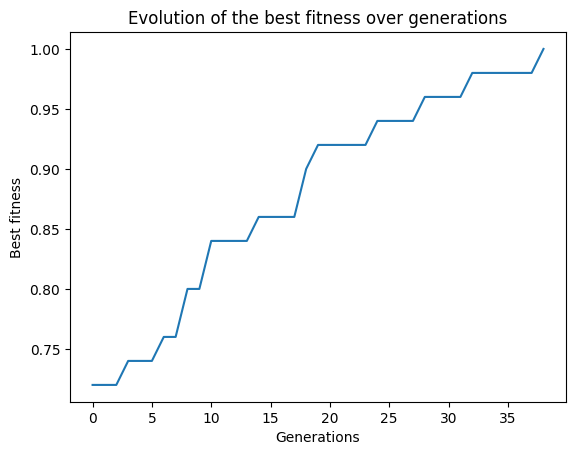

Number of fitness call :  9802
---------------------------------
Problem size: 2
Converged at generation 221
Best individual: [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Best fitness: 96.00%


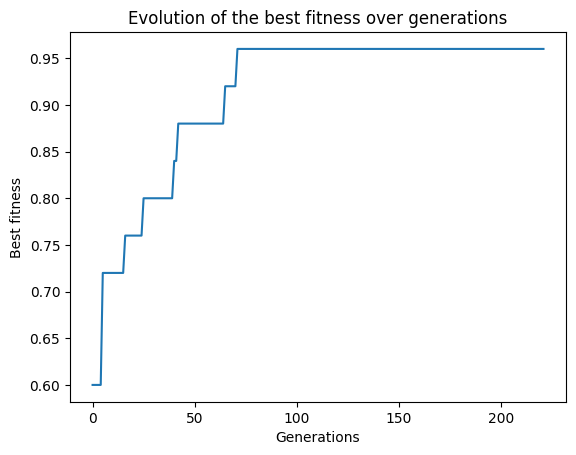

Number of fitness call :  55731
---------------------------------
Problem size: 3
Converged at generation 244
Best individual: [0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1]
Best fitness: 78.00%


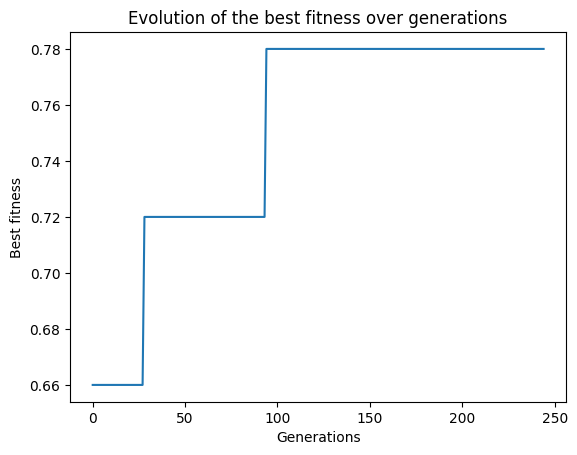

Number of fitness call :  61499
---------------------------------
Problem size: 4
Converged at generation 201
Best individual: [1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1]
Best fitness: 64.00%


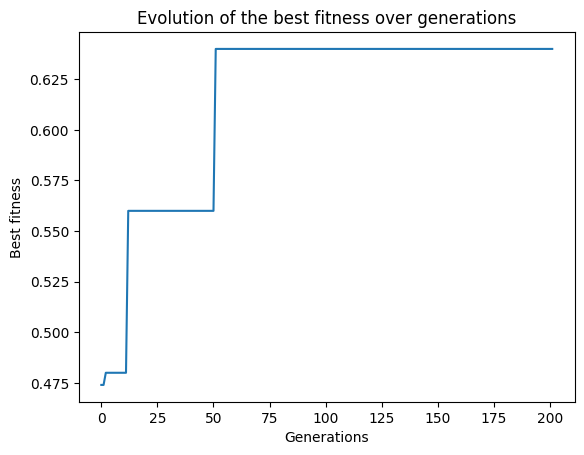

Number of fitness call :  50707
---------------------------------
Problem size: 5
Converged at generation 163
Best individual: [1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1]
Best fitness: 60.00%


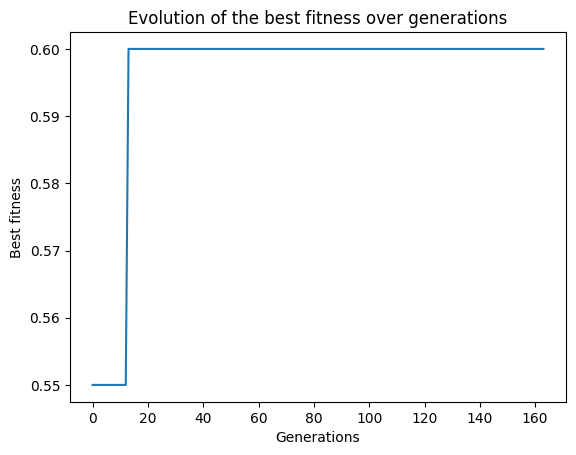

Number of fitness call :  41167
---------------------------------


In [21]:
for pb_size in PROBLEM_SIZE:
    print(f"Problem size: {pb_size}")
    fitness = lab9_lib.make_problem(pb_size)
    evolution(population, early_stop=150)
    print("Number of fitness call : ", fitness.calls)
    print("---------------------------------")

Putting a too small early stop is not a good idea with bigger problem size as it prevent from stopping at higher fitness values.
We can clearly see that with higher problem size the best individuals as a fitness wich is smaller.